# Walmart sales dataset exploration
### Authors: Jase Miguel Correa and Ana Maria Pinto

In this file we are going to load the walmart weekly sales dataset from the kaggle competition to understand the information they are giving from the weekly sales of 45 stores from USA. This dataset contains the weekly sales from 2010-02-05 to 2012-11-01.

In [1]:
import pandas as pd

## The Dataset

The Walmart sales forecast dataset has the following four files:
 * train.csv
 * test.csv
 * features.csv
 * stores.csv

The train and test datasets contains information about each department of the 45 Walmart stores, the date of the week and if there is a holiday in that week, the difference between train and test files is that train contains the weekly sales, while the test doesn't.
The features files contains extra information about several of the dates in the training test, this additional data can be used together with the train data to obtain a better result when making the sales prediction. Finally, the stores files contains the 45 Walmart stores, their size and type of store.

### Loading the data using pandas

#### Train
This is the historical training data, which covers to 2010-02-05 to 2012-11-01.Train contains the following columns:

 * Store: the store number
 * Dept: the department number
 * Date: the week
 * Weekly_Sales:  sales for the given department in the given store
 * IsHoliday: whether the week is a special holiday week

In [2]:
train = pd.read_csv('data/train.csv', parse_dates=['Date'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


#### Features

Features contains additional data related to the store, department, and regional activity for the given dates. Features contains the following columns:

 * Store: the store number
 * Date: the week
 * Temperature: average temperature in the region
 * Fuel_Price: cost of fuel in the region
 * MarkDown1-5: anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
 * CPI: the consumer price index
 * Unemployment; the unemployment rate
 * IsHoliday; whether the week is a special holiday week


In [3]:
features = pd.read_csv('data/features.csv', parse_dates=['Date'])
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


#### Stores
The stores file contains three columns:
 * Store: numbered from 1 to 45, is the number of the anonymized store that participated to build this dataset.
 * Type: type of the store.
 * Size: the size of the store.

Walmart didn't provide much information about what is the type of the store, also they didn't provide the units of the store size.

In [4]:
stores = pd.read_csv('data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Exploring the data

Shape of the three csv files

In [5]:
print("Shape of train data    ", train.shape)
print("Shape of features data ", features.shape)
print("Shape of stores data   ", stores.shape)

Shape of train data     (421570, 5)
Shape of features data  (8190, 12)
Shape of stores data    (45, 3)


#### Train data
Find how many unique dates, stores and departments are in the train dataset.
Verify that there are no null values in train.

In [6]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [7]:
train_date_list = train['Date'].unique()
train_date_list.sort()
print(len(train_date_list), "weeks")

143 weeks


In [8]:
train_store_list = train['Store'].unique()
train_store_list.sort()
print(len(train_store_list), "stores, numbered as:\n", train_store_list)

45 stores, numbered as:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [9]:
train_dept_list = train['Dept'].unique()
train_dept_list.sort()
print(len(train_dept_list), "departments, numbered as:\n", train_dept_list)

81 departments, numbered as:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 65 67 71 72 74 77 78 79 80 81 82 83 85 87 90
 91 92 93 94 95 96 97 98 99]


In [10]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

#### Features data
Check Check if there are null values in features. 

In [11]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [12]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### Stores data
Describe the stores data and check that there is no null data

In [13]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [14]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [15]:
type_store_list = stores['Type'].unique()
type_store_list.sort()
print(len(type_store_list), "type of stores:", type_store_list)

3 type of stores: ['A' 'B' 'C']


### Combining the features and stores datasets with the training data
Merge the train dataset and the features dataset using as common data between both the columns Store, Date and IsHoliday,

In [16]:
data = pd.merge(features, train, on=['Store','Date','IsHoliday'], how='inner')
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


Merge the stores data with the new dataset using as common data column Store

In [17]:
data = pd.merge(stores, data, on=['Store'], how='inner')
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


Sort the data in ascending order by date.

In [18]:
data = data.sort_values(by='Date')
data.head()

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
330761,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,3,14612.19
330762,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,4,26323.15
330763,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,5,36414.63
330764,35,B,103681,2010-02-05,27.19,2.784,NaN,NaN,NaN,NaN,NaN,135.352461,9.262,False,6,11437.81


In [19]:
data.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123
std,12.785297,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519
min,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


In [20]:
data.isnull().sum()

Store                0
Type                 0
Size                 0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Dept                 0
Weekly_Sales         0
dtype: int64

Save the new dataset in a csv file to use it in the next steps.

In [21]:
data.to_csv('data/walmart_dataset.csv', index=None)

### Plotting the data

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

Text(0.5, 0, 'Store')

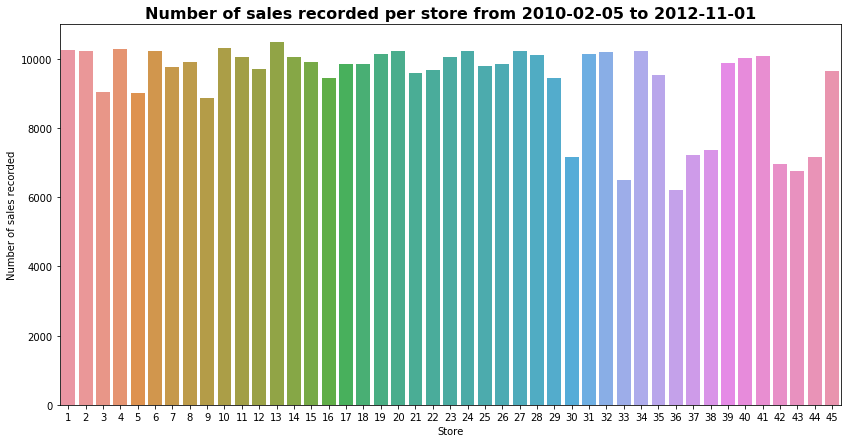

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))
stores = sns.countplot(x="Store", data=data, ax=ax)
stores.set_title("Number of sales recorded per store from 2010-02-05 to 2012-11-01", fontsize=16, fontweight='bold')
stores.set_ylabel("Number of sales recorded")
stores.set_xlabel("Store")

Text(0, 0.5, 'Number of registers')

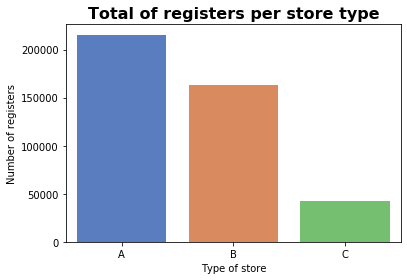

In [24]:
sns.set_palette("muted")
type_stores = sns.countplot(x="Type", data=data)
type_stores.set_title("Total of registers per store type", fontsize=16, fontweight='bold')
type_stores.set_xlabel("Type of store")
type_stores.set_ylabel("Number of registers")

Text(0.5, 0, 'Is holiday?')

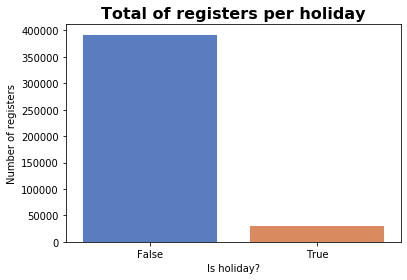

In [25]:
holiday = sns.countplot(x="IsHoliday", data=data)
holiday.set_title("Total of registers per holiday", fontsize=16, fontweight='bold')
holiday.set_ylabel("Number of registers")
holiday.set_xlabel("Is holiday?")

Text(0.5, 0, 'Week date')

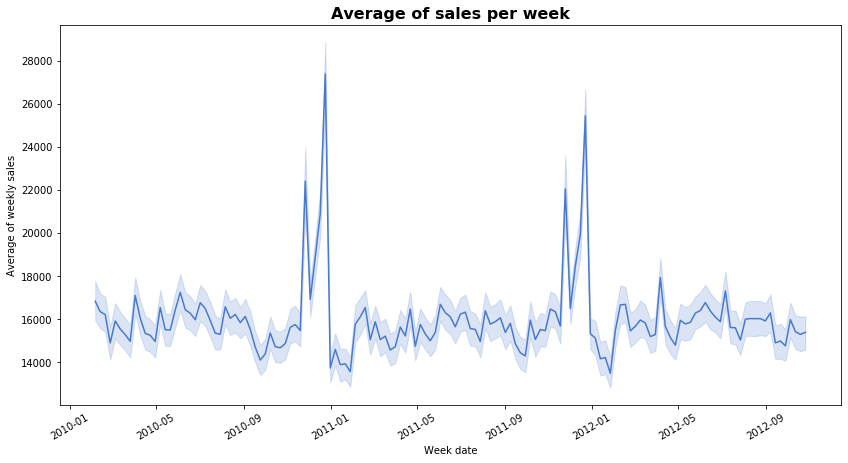

In [26]:
fig, ax = plt.subplots(figsize=(14, 7))
sales = sns.lineplot(data=data, x="Date", y="Weekly_Sales", ax=ax)
plt.xticks(rotation=30)
sales.set_title("Average of sales per week", fontsize=16, fontweight='bold')
sales.set_ylabel("Average of weekly sales")
sales.set_xlabel("Week date")

Text(0.5, 0, 'Week date')

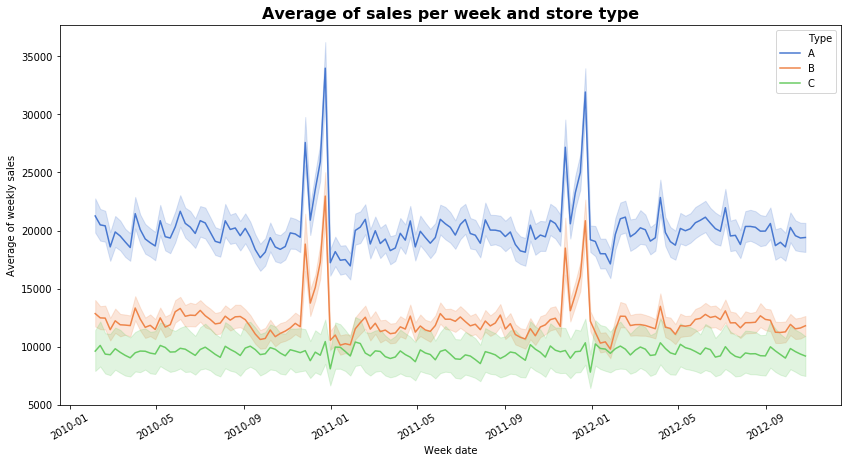

In [27]:
fig, ax = plt.subplots(figsize=(14, 7))
sales = sns.lineplot(data=data, x="Date", y="Weekly_Sales", hue="Type", ax=ax)
plt.xticks(rotation=30)
sales.set_title("Average of sales per week and store type", fontsize=16, fontweight='bold')
sales.set_ylabel("Average of weekly sales")
sales.set_xlabel("Week date")